# Homework 5

## by Dion Ho


# Import Python Libraries

In [1]:
import numpy as np
import math
import scipy
from scipy import linalg as la
from scipy import sparse
from math import pi
from math import factorial
from matplotlib import pyplot as plt

In [2]:
def rangeE(start,end): #I really dislike Python's range function, so I defined my own in line with other languages.
    return range(start,end+1)

## Q1

Since $\lVert\vec{x}\rVert_\infty = 1, \forall x_j \in \vec{x}, -1 \leq \vec{x_j} \leq 1$.
Each entry, $b_i$, of vector $(A\vec{x})$ is given by
$$b_i = \sum_{j=1}^n x_j a_{i,j}.$$
In order to maximise $b_i$, we choose
$$\begin{cases}
x_j = 1 & \mbox{if } a_{i,j} \geq 0 \\
x_j = -1 & \mbox{if } a_{i,j} < 0.
\end{cases}
$$
Therefore, 
$$\max\limits_{\lVert\vec{x}\rVert_\infty = 1}b_i = \sum_{j=1}^n |a_{i,j}|$$
which implies that 
\begin{align}
\lVert A \rVert_\infty &= \max\limits_{\lVert\vec{x}\rVert_\infty = 1} \lVert A\vec{x} \rVert_\infty \\
&= \max\limits_{1 \leq i \leq n} \sum_{j=1}^n |a_{i,j}|.
\end{align}

## Q2

Since the sequence $\left (\vec{x}^{\left (k\right )}\right )_{k \in \mathbb{N}^0}$ converges, it must be Cauchy. Therefore, for an arbitrary $\vec{x}^{\left (0\right )} \in \mathbb{R}^n$, for all $\epsilon z > 0$, where $z = \left \lVert \vec{x}^{\left (1\right )} - \vec{x}^{\left (0\right )} \right \rVert, \exists K \in \mathbb{N}^0$ such that $\forall m,k \geq K$, 
$$\left \lVert \vec{x}^{\left (m\right )} - \vec{x}^{\left (k\right )} \right \rVert< \epsilon z.$$
In particular, $\forall k \geq K$,
\begin{align}
&\left \lVert \vec{x}^{\left (k+1\right )} - \vec{x}^{\left (k\right )} \right \rVert < \epsilon z \\
&\implies \left \lVert T\vec{x}^{\left (k\right )} + \vec{c} - T\vec{x}^{\left (k-1\right )} - \vec{c} \right \rVert < \epsilon z \\
&\implies \left \lVert T\left (\vec{x}^{\left (k\right )} - \vec{x}^{\left (k-1\right )}\right ) \right \rVert < \epsilon z \\
&\implies \left \lVert T\left (T\vec{x}^{\left (k-1\right )} + \vec{c} - T\vec{x}^{\left (k-2\right )} - \vec{c}\right ) \right \rVert < \epsilon z \\
&\implies \left \lVert T^2\left (\vec{x}^{\left (k-1\right )} - \vec{x}^{\left (k-2\right )}\right ) \right \rVert < \epsilon z \\
&\implies \ldots \\
&\implies \left \lVert T^k \left (\vec{x}^{\left (1\right )} - \vec{x}^{\left (0\right )}\right ) \right \rVert < \epsilon z \\
&\implies \left \lVert T^k \right \rVert \left \lVert \vec{x}^{\left (1\right )} - \vec{x}^{\left (0\right )} \right \rVert \leq \left \lVert T^k \left (\vec{x}^{\left (1\right )} - \vec{x}^{\left (0\right )}\right ) \right \rVert < \epsilon z \\
&\implies \left \lVert T^k \right \rVert < \epsilon.
\end{align}
Therefore, $\lim\limits_{k\rightarrow\infty}T^k = 0_{nxn}$ which implies that $\rho\left (T\right ) < 1$ by property of the spectral radius.

## Q3

In [3]:
def jacobian_iteration(A,b,x1,tol=1e-8,maxiter=100):
    m = A.shape[1]
    D = np.diag(np.diag(A))
    AA = A - D
    D_inv = np.diag(1/np.diag(A))
    x = D_inv @ (b - (AA @ x1))
    iteration = 1
    residue = la.norm((x1 - x),np.inf)
    print("iter","   residue")
    print('{:>3d} {:> 22.16f}'.format(iteration, residue))
    while (residue > tol) & (maxiter >= iteration):
        x1 = x
        x = D_inv @ (b - (AA @ x1))
        residue = la.norm((x1 - x),np.inf)
        iteration += 1
        print('{:>3d} {:> 22.16f}'.format(iteration, residue))
    if maxiter >= iteration + 1:
        return x
    else:
        print("Failed to converge.")

In [4]:
def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

Code to generate the randomised test data.

In [5]:
size = np.random.randint(2,20)
x = np.random.rand(size,1)
A = diag_dom(size)
b = A @ x
x1 = np.random.rand(size,1)

In [6]:
ans = jacobian_iteration(A,b,x1)
print(ans,np.allclose(ans, x)) #jacobian_iteration works even for random A, x, and initial guess x1.

iter    residue
  1     0.7764758243471421
  2     0.3495448900418142
  3     0.1747724450209071
  4     0.0559271824066904
  5     0.0279635912033452
  6     0.0089483491850704
  7     0.0044741745925352
  8     0.0014317358696111
  9     0.0007158679348055
 10     0.0002290777391381
 11     0.0001145388695690
 12     0.0000366524382620
 13     0.0000183262191310
 14     0.0000058643901220
 15     0.0000029321950610
 16     0.0000009383024194
 17     0.0000004691512097
 18     0.0000001501283869
 19     0.0000000750641935
 20     0.0000000240205420
 21     0.0000000120102710
 22     0.0000000038432868
[[0.24805068]
 [0.84423675]
 [0.04296188]
 [0.95412544]
 [0.14932185]] True


## Q4

In [7]:
def jacobian_iteration_plot(A,b,x1,plot = False,tol=1e-8,maxiter=100):
    m = A.shape[1]
    D = np.diag(np.diag(A))
    AA = A - D
    D_inv = np.diag(1/np.diag(A))
    x = D_inv @ (b - (AA @ x1))
    iteration = 1
    residue = la.norm((x1 - x),np.inf)
    if plot == True:
        res_plt = [residue]
    else:
        print("iter","   residue")
        print('{:>3d} {:> 22.16f}'.format(iteration, residue))
    while (residue > tol) & (maxiter >= iteration):
        x1 = x
        x = D_inv @ (b - (AA @ x1))
        residue = la.norm((x1 - x),np.inf)
        iteration += 1
        if plot == True:
            res_plt.append(residue)
        else:
            print('{:>3d} {:> 22.16f}'.format(iteration, residue))
    if plot == True:
        plt.figure(figsize=(10,5))
        plt.semilogy(rangeE(1,iteration),np.abs(res_plt),'o')
        plt.title('Plot of Residue for Jacobian Iteration against Iteration Count',fontsize=18)
        plt.xlabel('Iteration Count',fontsize=14)
        plt.ylabel('Residue',fontsize=14)
    if maxiter >= iteration + 1:
        return x
    else:
        print("Failed to converge.")

Code to generate the randomised test data.

In [8]:
size = np.random.randint(3,20)
x = np.random.rand(size,1)
A = diag_dom(size)
b = A @ x
x1 = np.random.rand(size,1)

[[0.18547567]
 [0.77368695]
 [0.83485529]
 [0.12636902]
 [0.02566578]
 [0.43925882]
 [0.6909565 ]
 [0.55612317]
 [0.39498533]
 [0.07263606]
 [0.27571525]
 [0.65974984]
 [0.31648373]] True


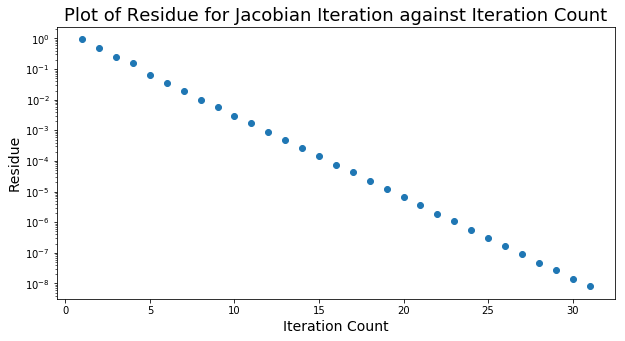

In [9]:
ans = jacobian_iteration_plot(A,b,x1,True)
print(ans,np.allclose(ans, x)) #The plot shows that the log of the residue decreases about linearly as the number of iterations increase.

## Q5: With the addition of tuning parameter $\omega$ which defaults to 1.

In [10]:
def gauss_seidel_plot(A,b,x1,plot=False,tol=1e-8,maxiter=100,omega=1):
    m = A.shape[1]
    x = np.zeros(np.shape(b))
    for ii in rangeE(0,m-1):
        sum1 = 0
        sum2 = 0
        for jj in rangeE(0,ii-1):
            sum1 += A[ii,jj]*x[jj]
        for jj in rangeE(ii,m-1): #Without omega, this is rangeE(ii+1,m-1)
            sum2 += A[ii,jj]*x1[jj]
        x[ii] = x1[ii] + omega*(b[ii] - sum1 - sum2)/A[ii,ii]
    iteration = 1
    residue = la.norm((x1 - x),np.inf)
    if plot == True:
        res_plt = [residue]
    else:
        print("iter","   residue")
        print('{:>3d} {:> 22.16f}'.format(iteration, residue))
    while (residue > tol) & (maxiter >= iteration):
        x1 = np.copy(x)
        for ii in rangeE(0,m-1):
            sum1 = 0
            sum2 = 0
            for jj in rangeE(0,ii-1):
                sum1 += A[ii,jj]*x[jj]
            for jj in rangeE(ii,m-1):
                sum2 += A[ii,jj]*x1[jj]
            x[ii] = x1[ii] + omega*(b[ii] - sum1 - sum2)/A[ii,ii]
        residue = la.norm((x1 - x),np.inf)
        iteration += 1
        if plot == True:
            res_plt.append(residue)
        else:
            print('{:>3d} {:> 22.16f}'.format(iteration, residue))
    if plot == True:
        plt.figure(figsize=(10,5))
        plt.semilogy(rangeE(1,iteration),np.abs(res_plt),'o')
        plt.title('Plot of Residue for Gauss-Seidel Method against Iteration Count',fontsize=18)
        plt.xlabel('Iteration Count',fontsize=14)
        plt.ylabel('Residue',fontsize=14)
    if maxiter >= iteration + 1:
        return x
    else:
        print("Failed to converge.")

Code to generate the randomised test data.

In [11]:
size = np.random.randint(3,20)
x = np.random.rand(size,1)
A = diag_dom(size)
b = A @ x
x1 = np.random.rand(size,1)

[[0.70611153]
 [0.99701531]
 [0.25470814]
 [0.48397545]
 [0.55663815]
 [0.8415545 ]
 [0.4825912 ]
 [0.72572751]
 [0.63550765]
 [0.28628268]
 [0.61240672]
 [0.85577399]
 [0.46960637]
 [0.81321256]
 [0.48044674]
 [0.3154065 ]
 [0.97171256]] True


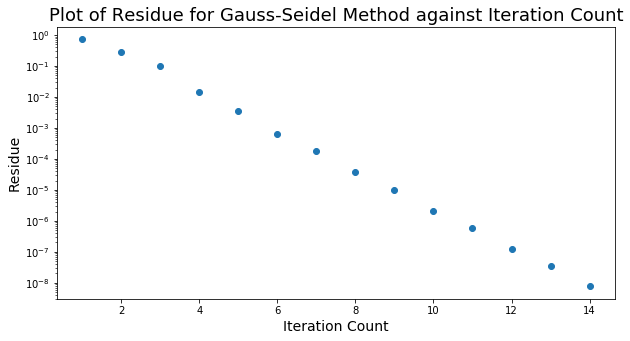

In [12]:
ans = gauss_seidel_plot(A,b,x1,True)
print(ans,np.allclose(ans, x)) #The plot shows that the log of the residue decreases about linearly as the number of iterations increase.

## Q6 & Q7: Gauss-Seidel with the addition of tuning parameter $\omega$ which defaults to 1.

In [13]:
def gauss_seidel_plot_sparse(A,b,x1,plot=False,tol=1e-8,maxiter=100,omega=1):
    m = A.shape[1]
    x = np.zeros(np.shape(b))
    D = sparse.diags(A.diagonal())
    AA = A - D
    for ii in rangeE(0,m-1):
        rowstart = AA.indptr[ii]
        rowend = AA.indptr[ii+1]
        Aix = AA.data[rowstart:rowend] @ x1[A.indices[rowstart:rowend]]
        x[ii] = (1-omega)*x1[ii] + omega*(b[ii] - Aix)/A[ii,ii]
    iteration = 1
    residue = la.norm((x1 - x),np.inf)
    if plot == True:
        res_plt = [residue]
    else:
        print("iter","   residue")
        print('{:>3d} {:> 22.16f}'.format(iteration, residue))
    while (residue > tol) & (maxiter >= iteration):
        x1 = np.copy(x)
        for ii in rangeE(0,m-1):
            rowstart = AA.indptr[ii]
            rowend = AA.indptr[ii+1]
            Aix = AA.data[rowstart:rowend] @ x1[AA.indices[rowstart:rowend]]
            x[ii] = (1-omega)*x1[ii] + omega*(b[ii] - Aix)/A[ii,ii]
        residue = la.norm((x1 - x),np.inf)
        iteration += 1
        if plot == True:
            res_plt.append(residue)
        else:
            print('{:>3d} {:> 22.16f}'.format(iteration, residue))
    if plot == True:
        plt.figure(figsize=(10,5))
        plt.semilogy(rangeE(1,iteration),np.abs(res_plt),'o')
        plt.title('Plot of Residue for Gauss-Seidel Method against Iteration Count',fontsize=18)
        plt.xlabel('Iteration Count',fontsize=14)
        plt.ylabel('Residue',fontsize=14)
    if maxiter >= iteration + 1:
        return x
    else:
        print("Failed to converge.")

In [14]:
def diag_dom_sparse(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    A = sparse.csr_matrix((data, (rows,cols)), shape=(n,n))
    d = []
    for i in range(n):
        d.append(np.sum(np.abs(A[i])) + 1)
    A.setdiag(d)
    return A

In [15]:
size = np.random.randint(40000,60000)
x = np.random.rand(size,1)
A = diag_dom_sparse(size) #Generation of the sparse matrix may take about a minute.
b = A @ x
x1 = np.random.rand(size,1)

c:\users\dionh\appdata\local\programs\python\python36\lib\site-packages\scipy\sparse\compressed.py:708: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self[i, j] = values


In [16]:
ans = gauss_seidel_plot_sparse(A,b,x1)
print(ans,np.allclose(ans, x)) #I only ran a few tests, but it seems like omega = 1 frequently results in the fastest convergence.

iter    residue
  1     1.0685991783545277
  2     0.1427634065680327
  3     0.0128856240558397
  4     0.0009054782710761
  5     0.0000809817446024
  6     0.0000089609958783
  7     0.0000016963363094
  8     0.0000004082824351
  9     0.0000001035546053
 10     0.0000000259689003
 11     0.0000000064546743
[[0.08607442]
 [0.58370597]
 [0.67832102]
 ...
 [0.96366667]
 [0.97343648]
 [0.23883441]] True
